In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Read an Excel file
file_path = '/Users/jahdovanterpool/Downloads/personal_transactions.xlsx'
try:
    df = pd.read_excel(file_path,sheet_name='Personal_Transactions')
    print("Excel file loaded successfully!")
except FileNotFoundError:
    print("Error file not found!")
    exit()

Excel file loaded successfully!


In [4]:
# Create a 'Month' column to group our data formatted as YYYY-MM
df['Month'] = df['Date'].dt.to_period('M')
df

,Date,Description,Amount,Transaction Type,Category,Type,Account Name,Month
0,2018-01-01,Amazon,11.11,debit,Shopping,Expense,Platinum Card,2018-01
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Expense,Checking,2018-01
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Expense,Silver Card,2018-01
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Income,Platinum Card,2018-01
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Expense,Platinum Card,2018-01
...,...,...,...,...,...,...,...,...
1048570,NaT,NaN,NaN,NaN,NaN,Income,NaN,NaT
1048571,NaT,NaN,NaN,NaN,NaN,Income,NaN,NaT
1048572,NaT,NaN,NaN,NaN,NaN,Income,NaN,NaT
1048573,NaT,NaN,NaN,NaN,NaN,Income,NaN,NaT


In [5]:
# Remove white spaces
df.columns = df.columns.str.strip()

In [8]:
# Calculate the monthly summary

monthly_summary = df.groupby(['Month','Type'])['Amount'].sum().unstack().fillna(0)
monthly_summary['Net Cash Flow'] = monthly_summary['Income'] - monthly_summary['Expense']

monthly_summary

Type,Expense,Income,Net Cash Flow
Month,,,
2018-01,2931.45,7162.89,4231.44
2018-02,3165.05,5220.75,2055.70
2018-03,3500.16,7321.50,3821.34
2018-04,6029.54,7166.88,1137.34
2018-05,11392.03,5091.55,-6300.48
2018-06,3665.88,6017.19,2351.31
2018-07,2968.98,4666.34,1697.36
2018-08,2396.18,7379.15,4982.97
2018-09,3286.99,5234.71,1947.72


In [6]:
# Calculate summary by expense category

category_expenses = df[df['Type'] == 'Expense'].groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_expenses

Category
Credit Card Payment       33041.36
Mortgage & Rent           24754.50
Home Improvement          19092.87
Groceries                  2795.21
Utilities                  2776.00
Restaurants                2613.02
Shopping                   1973.24
Gas & Fuel                 1715.17
Mobile Phone               1680.40
Internet                   1570.88
Auto Insurance             1350.00
Electronics & Software      719.00
Alcohol & Bars              539.13
Haircut                     378.00
Fast Food                   330.63
Music                       224.49
Movies & DVDs               222.19
Coffee Shops                115.54
Television                  104.78
Food & Dining                77.75
Entertainment                 9.62
Name: Amount, dtype: float64

In [10]:
# Display Results
print("\n" + "="*40)
print("     Expense Breakdown by Category")
print("="*40)
print(category_expenses)

print("\n" + "="*40)
print("      Monthly Financial Summary")
print("="*40)
print(monthly_summary)
print("="*40)


     Expense Breakdown by Category
Category
Credit Card Payment       33041.36
Mortgage & Rent           24754.50
Home Improvement          19092.87
Groceries                  2795.21
Utilities                  2776.00
Restaurants                2613.02
Shopping                   1973.24
Gas & Fuel                 1715.17
Mobile Phone               1680.40
Internet                   1570.88
Auto Insurance             1350.00
Electronics & Software      719.00
Alcohol & Bars              539.13
Haircut                     378.00
Fast Food                   330.63
Music                       224.49
Movies & DVDs               222.19
Coffee Shops                115.54
Television                  104.78
Food & Dining                77.75
Entertainment                 9.62
Name: Amount, dtype: float64

      Monthly Financial Summary
Type      Expense   Income  Net Cash Flow
Month                                    
2018-01   2931.45  7162.89        4231.44
2018-02   3165.05  5220.75      

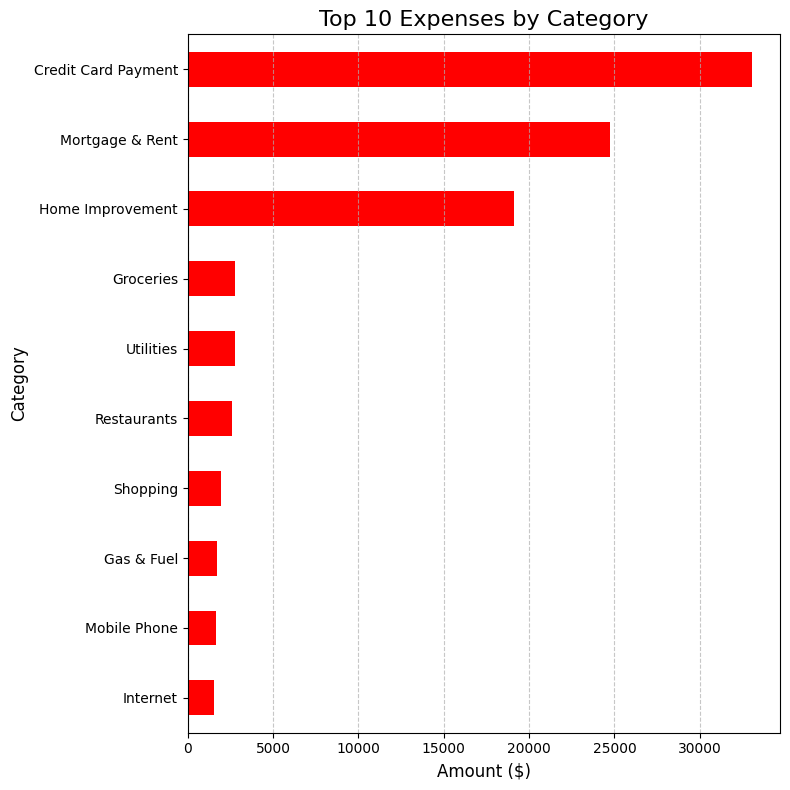

In [13]:
# Visualize the Data ---
# Create a bar chart for the top 10 expense categories.
top_10_expenses = category_expenses.head(10).sort_values(ascending=True) # Sort for better plotting

plt.figure(figsize=(8, 8)) # Create a figure to draw on
top_10_expenses.plot(kind='barh', color='red') # Create a horizontal bar plot

plt.title('Top 10 Expenses by Category', fontsize=16)
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add a grid for readability
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show() # Display the plot in a new window